### Preprocessing

In [384]:
# import data
url = "/Users/arpanganguli/Documents/Professional/Finance/ISLR/Wage.csv"
Wage = pd.read_csv(url, index_col='SlNo')

In [385]:
Wage.head()

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
SlNo,,,,,,,,,,,
231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063334962759,75.0431540173515
86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.25527250510331,70.47601964694451
161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.8750612633917,130.982177377461
155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041392685158231,154.68529299563
11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063334962759,75.0431540173515


In [386]:
Wage.describe().round(2)

,year,age,logwage,wage
count,"3,000.0","3,000.0","3,000.0","3,000.0"
mean,"2,005.79",42.41,4.65,111.7
std,2.03,11.54,0.35,41.73
min,"2,003.0",18.0,3.0,20.09
25%,"2,004.0",33.75,4.45,85.38
50%,"2,006.0",42.0,4.65,104.92
75%,"2,008.0",51.0,4.86,128.68
max,"2,009.0",80.0,5.76,318.34


In [387]:
Wage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 231655 to 453557
Data columns (total 11 columns):
year          3000 non-null int64
age           3000 non-null int64
maritl        3000 non-null object
race          3000 non-null object
education     3000 non-null object
region        3000 non-null object
jobclass      3000 non-null object
health        3000 non-null object
health_ins    3000 non-null object
logwage       3000 non-null float64
wage          3000 non-null float64
dtypes: float64(2), int64(2), object(7)
memory usage: 281.2+ KB


### 6.a. Polynomial regression to predict wage using age (through cross-validation to select the optimal degree, $d$)

In [388]:
from sklearn.model_selection import KFold as KF, cross_val_score as CVS
from sklearn.linear_model import LinearRegression

In [389]:
X = Wage[['age']]
y = Wage[['wage']]

In [390]:
# selecting M, the number of components that give the lowest cross-validation error
n = len(X)
kf10 = KF(n_splits=10, shuffle=True, random_state=42)

lm = LinearRegression()
MSEdf= pd.DataFrame()
Xi = pd.DataFrame()

# calculating MSE with only the intercept through cross-validation
mse = -1*CVS(lm, np.ones((n,1)), y, cv=kf10, scoring='neg_mean_squared_error').mean()    
MSEdf = MSEdf.append([round(mse, 9)], ignore_index=True)

# calculating MSE for 15 degrees through cross-validation
for i in np.arange(1, 15):
    Xi = pd.concat([Xi, X**i], axis = 1)
    mse = -1*CVS(lm, Xi.iloc[:,:i], y, cv=kf10, scoring='neg_mean_squared_error').mean()
    MSEdf = MSEdf.append([round(mse, 9)])
    
MSEdf.reset_index(drop=True, inplace=True)
MSEdf.columns = ['MSE']
MSEdf

,MSE
0,"1,741.674153197"
1,"1,677.503541934"
2,"1,600.903452329"
3,"1,597.002914788"
4,"1,595.880330177"
5,"1,595.98048775"
6,"1,595.371546831"
7,"1,595.689077816"
8,"1,596.002897539"
9,"1,596.244908767"


Text(0,0.5,'MSE')

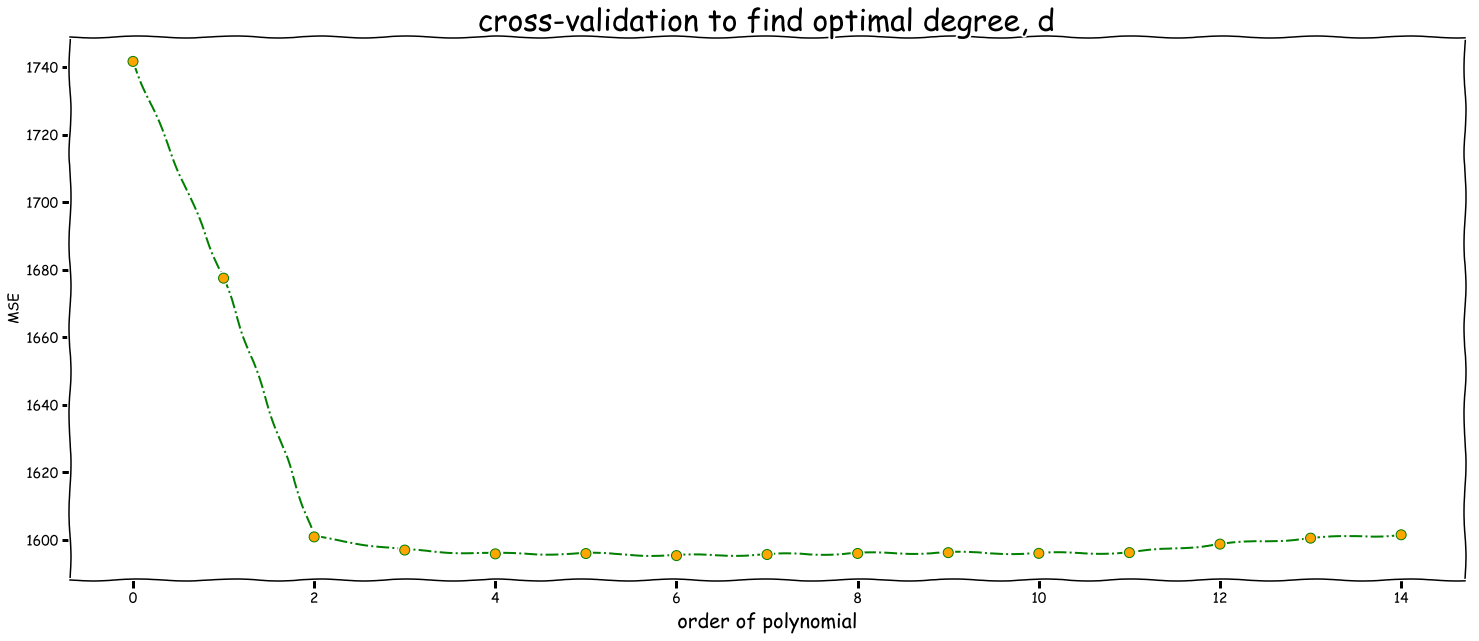

In [391]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.plot(MSEdf, color='g',  linestyle='-.', marker='o', markerfacecolor='orange', markersize=10)
plt.title('cross-validation to find optimal degree, d', fontsize=30)
plt.xlabel('order of polynomial', fontsize=20)
plt.ylabel('MSE')

**Cross-validation suggests $d$=6 to be give the smallest error and therefore is the optimal degree.**

**Comparing it with $d$=4, which as suggested in R Lab 7.8.1 provides the best fit**

In [392]:
df = pd.concat([y, X, X**2, X**3, X**4, X**5, X**6], axis=1)
df.columns = ['wage', 'age', 'age^2', 'age^3', 'age^4', 'age^5', 'age^6']
lmfit4 = ols("df['wage']~df['age']+df['age^2']+df['age^3']+df['age^4']", data=df).fit()
lmfit5 = ols("df['wage']~df['age']+df['age^2']+df['age^3']+df['age^4']+df['age^5']", data=df).fit()
lmfit6 = ols("df['wage']~df['age']+df['age^2']+df['age^3']+df['age^4']+df['age^5']+df['age^6']", data=df).fit()

In [405]:
anova_table = sm.stats.anova_lm(lmfit4, lmfit5, lmfit6, typ=1)
anova_table.index = anova_table.index+1
anova_table.round(2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
1,"2,995.0","4,771,604.25",0.0,nan,nan,nan
2,"2,994.0","4,770,321.69",1.0,"1,282.56",0.81,0.37
3,"2,993.0","4,766,389.43",1.0,"3,932.26",2.47,0.12


**ANOVA however suggests that any degree, $d$>4 is not statistically significant (since the $p$-value>5 for $d$>4).**

Text(0,0.5,'wage')

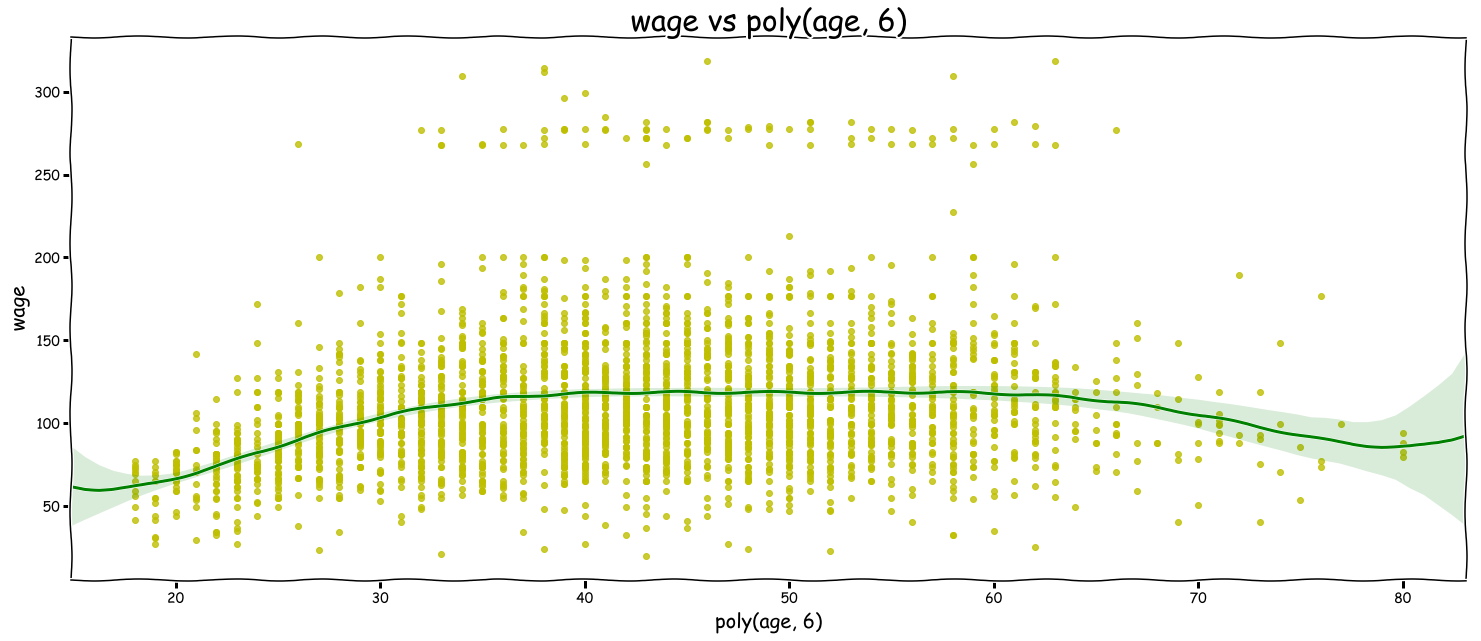

In [403]:
X1 = Wage['age']
X2 = X1**2
X3 = X1**3
X4 = X1**4
X5 = X1**5
X6 = X1**6
plotdf = pd.concat([y, X1, X2, X3, X4, X5, X6], axis=1)
plotdf.columns = ['wage', 'age', 'age^2', 'age^3', 'age^4', 'age^5', 'age^6']
plt.xkcd()
plt.figure(figsize = (25, 10))
sns.regplot('age', 'wage', data=plotdf, fit_reg=True, ci = 95, color='y', order=6, line_kws={'color':'green'})
plt.title('wage vs poly(age, 6)', fontsize=30)
plt.xlabel('poly(age, 6)', fontsize=20)
plt.ylabel('wage', fontsize=20)

### 6.b. Step function to predict wage using age (through cross-validation to select the optimal number of cuts)

In [395]:
df = pd.concat([y, X], axis=1)
Wage_cut, bins = pd.cut(Wage.age, 4, retbins = True, right = True)
df.head()

,wage,age
SlNo,,
231655,75.0431540173515,18
86582,70.47601964694451,24
161300,130.982177377461,45
155159,154.68529299563,43
11443,75.0431540173515,50


In [396]:
# selecting M, the number of components that give the lowest cross-validation error
n = len(X)
kf10 = KF(n_splits=10, shuffle=True, random_state=42)

MSEdf= pd.DataFrame()
lm = LinearRegression()

# calculating MSE with only the intercept through cross-validation
mse = -1*CVS(lm, np.ones((n,1)), y, cv=kf10, scoring='neg_mean_squared_error').mean()    
MSEdf = MSEdf.append([round(mse, 9)], ignore_index=True)

# calculating MSE for 15 degrees through cross-validation
for i in np.arange(1, 15):
    X = pd.DataFrame(pd.cut(Wage.age, i))
    X = pd.get_dummies(X)
    y = Wage.wage
    mse = -1*CVS(lm, X, y, cv=kf10, scoring='neg_mean_squared_error').mean()
    MSEdf = MSEdf.append([round(mse, 9)])
    
MSEdf.reset_index(drop=True, inplace=True)
MSEdf.columns = ['MSE']
MSEdf

,MSE
0,"1,741.674153197"
1,"1,741.674153197"
2,"1,734.717172089"
3,"1,684.539254746"
4,"1,636.953990638"
5,"1,631.80540477"
6,"1,624.230466594"
7,"1,612.850691273"
8,"1,601.835681047"
9,"1,613.977110889"


Text(0,0.5,'MSE')

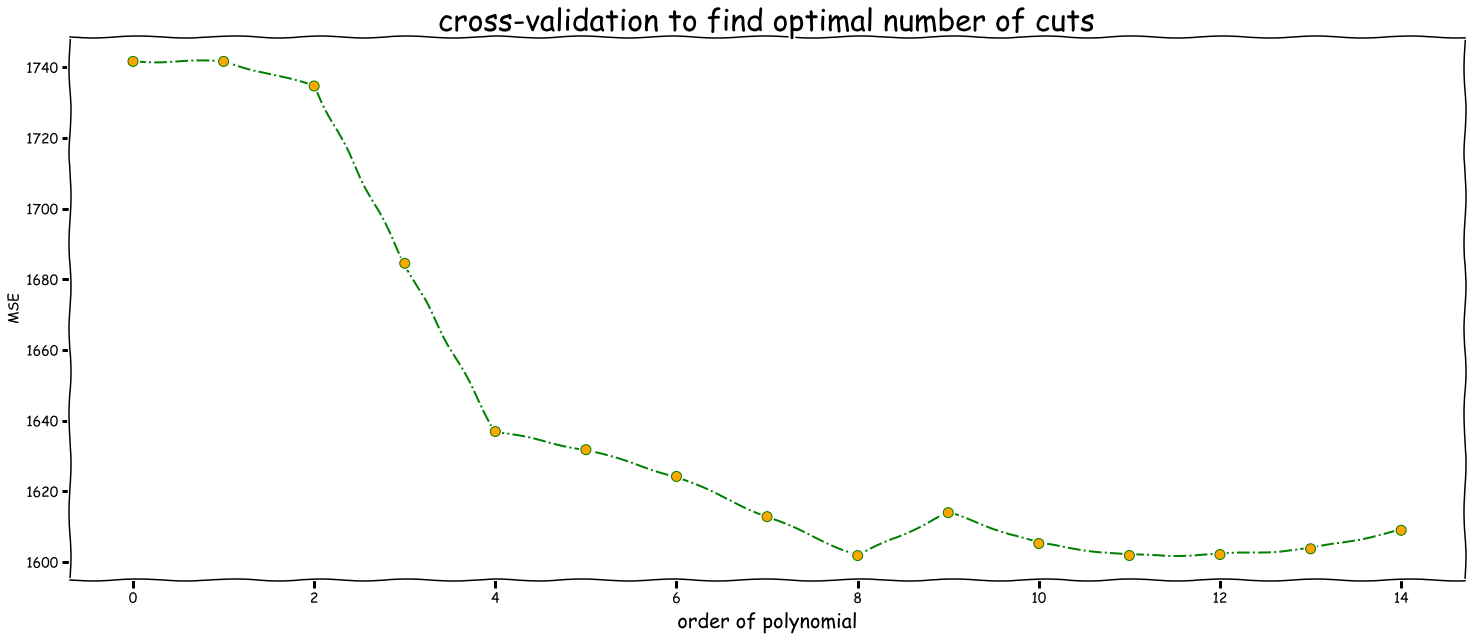

In [397]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.plot(MSEdf, color='g',  linestyle='-.', marker='o', markerfacecolor='orange', markersize=10)
plt.title('cross-validation to find optimal number of cuts', fontsize=30)
plt.xlabel('order of polynomial', fontsize=20)
plt.ylabel('MSE')

**From the graph, it's clear that the MSE is least at $M$=8.**

**Performing regression**

In [398]:
dfX = pd.DataFrame(pd.cut(Wage.age, 8))
dfX = pd.get_dummies(dfX)
dfX['age'] = Wage.age
dfy = Wage.wage
df_step = pd.concat([dfy, dfX], axis=1)
df_step.head()

,wage,"age_(17.938, 25.75]","age_(25.75, 33.5]","age_(33.5, 41.25]","age_(41.25, 49.0]","age_(49.0, 56.75]","age_(56.75, 64.5]","age_(64.5, 72.25]","age_(72.25, 80.0]",age
SlNo,,,,,,,,,,
231655,75.0431540173515,1,0,0,0,0,0,0,0,18
86582,70.47601964694451,1,0,0,0,0,0,0,0,24
161300,130.982177377461,0,0,0,1,0,0,0,0,45
155159,154.68529299563,0,0,0,1,0,0,0,0,43
11443,75.0431540173515,0,0,0,0,1,0,0,0,50


In [399]:
X = df_step[df_step.columns.difference(['wage', 'age'])]
y = df_step['wage']

lmfitOLS = ols('y~X', data=df_step).fit()
lmfit = LinearRegression().fit(X, y)

In [400]:
lmfitOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     39.54
Date:                Wed, 23 Jan 2019   Prob (F-statistic):           1.85e-53
Time:                        00:16:17   Log-Likelihood:                -15317.
No. Observations:                3000   AIC:                         3.065e+04
Df Residuals:                    2992   BIC:                         3.070e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     94.2472      1.323     71.213      0.000      91.652      96.842
X[0]         -17.9654      2.670     -6.728      0.000     -23.201     -12.730
X[1]           7.8678      2.036      3.864      0.000       3.876      11.860
X[2]          22.2602      1.898     11.727      0.000      18.538      25.982
X[3]          25.5357      1.860     13.731      0.000      21.889      29.182
X[4]          22.1704      2.055     10.790      0.000      18.142      26.199
X[5]          26.1370      2.501     10.452      0.000      21.234      31.040
X[6]          10.9828      4.976      2.207      0.027       1.226      20.740
X[7]          -2.7413      8.413     -0.326      0.745     -19.238      13.755
==============================================================================
Omnibus:                     1086.216   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4847.198
Skew:                           1.707   Prob(JB):                         0.00
Kurtosis:                       8.208   Cond. No.                     1.71e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.22e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Text(0,0.5,'wage')

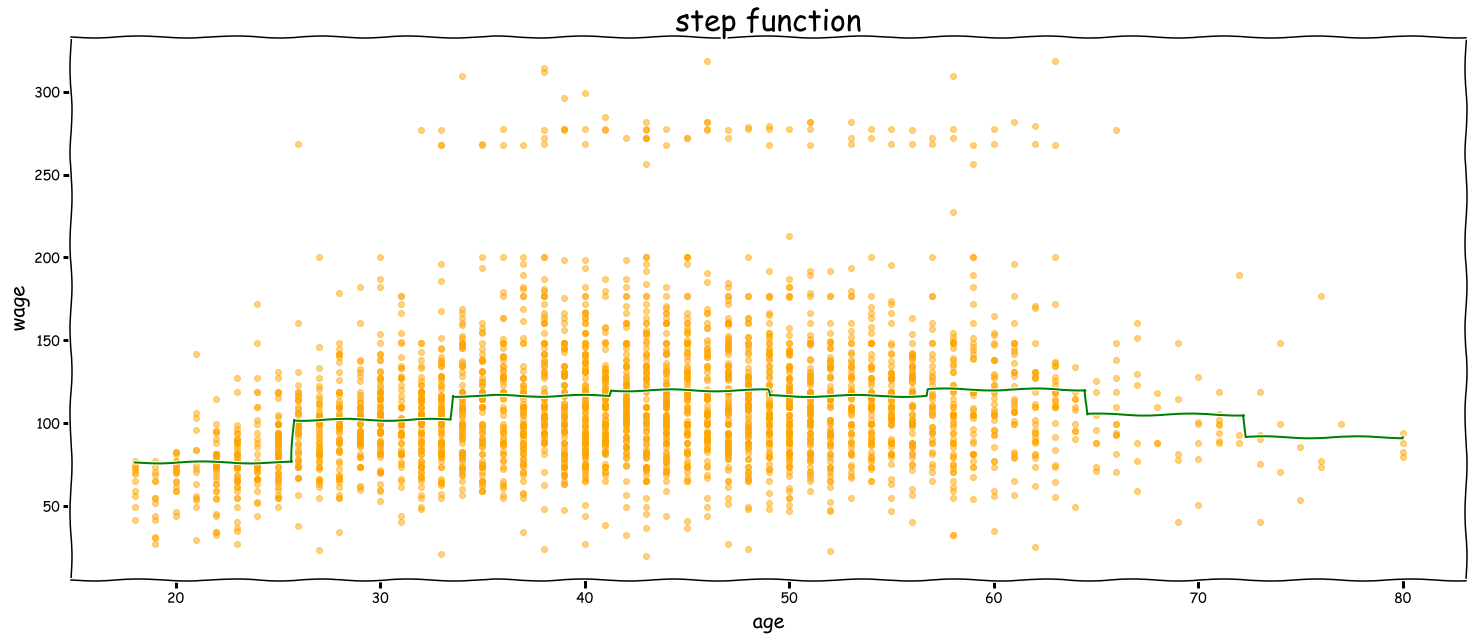

In [401]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.scatter(df_step.age, df_step.wage, color='orange', alpha=.5)
agerange = np.linspace(df_step.age.min(), df_step.age.max(), 1000)
agerange_d = pd.get_dummies(pd.cut(age_range, 8))
predictions = lmfit.predict(agerange_d)
plt.plot(agerange, predictions, color='g')
plt.title('step function', fontsize=30)
plt.xlabel('age', fontsize=20)
plt.ylabel('wage', fontsize=20)